# Machine Learning Assignment 1 (21100042)
## Preprocessing Stage:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My\ Drive/Machine\ Learning/Assignment\ 1

/content/drive/My Drive/Machine Learning/Assignment 1


In [ ]:
import pandas as pd
import numpy as np 
import sys
import re

In [ ]:
def compute_tp_tn_fn_fp(y_actual, y_predicted, sentiment):
  tp = sum((y_actual == sentiment) & (y_predicted == sentiment))
  tn = sum((y_actual != sentiment) & (y_predicted != sentiment))
  fp = sum((y_actual == sentiment) & (y_predicted != sentiment))
  fn = sum((y_actual != sentiment) & (y_predicted == sentiment))
  return tp, tn, fp, fn

In [ ]:
def compute_precision(tp, fp):
  val = tp+fp
  if val == 0:
    return "Unable to calculate"
  else:
    return (tp)/ float (tp+fp)

In [ ]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
def compute_recall(tp, fn):
  val = tp+fn
  if val == 0:
    return "Unable to calculate"
  else:
    return (tp)/ float (tp+fn)

In [ ]:
def compute_f1_score(precision, recall):
  if isinstance(precision, str) or isinstance(recall, str):
    return "Unable to calculate f1 score"
  else:
    val = precision + recall
    if val == 0.0:
      return "Unable to calculate"
    else:
      return (2 * precision * recall)/ float (precision + recall)

In [ ]:
# We saved the training data, test data and stop words in variables
test = pd.read_csv (r'test.csv')
train = pd.read_csv (r'train.csv')
filename = 'stop_words.txt'
stop_words = ''

with open(filename) as f:
    stop_words = f.readlines()

In [ ]:
# Removed the new line character form all of the words
stop_words = [x.replace('\n', '') for x in stop_words]

In [ ]:
# Convered the tweets in test data to lower case
test['Tweet'] = test['Tweet'].str.lower()

# Convered the tweets in train data to lower case
train['Tweet'] = train['Tweet'].str.lower()

In [ ]:
# Removed stop words from the test data
pat = r'\b(?:{})\b'.format('|'.join(stop_words))
test['Tweet'] = test['Tweet'].str.replace(pat, '')
test['Tweet'] = test['Tweet'].str.replace(r'\s+', ' ')

# Removed stop words from the train data
pat = r'\b(?:{})\b'.format('|'.join(stop_words))
train['Tweet'] = train['Tweet'].str.replace(pat, '')
train['Tweet'] = train['Tweet'].str.replace(r'\s+', ' ')

In [ ]:
# Removed tagged accounts, wesbites links and hashtags from the training data
list1 = []
for words in train['Tweet']:
    sen = " ".join(filter(lambda x:x[0]!='@', words.split()))
    sen = " ".join(filter(lambda x:x[0]!='#', sen.split()))
    sen = re.sub(r"http\S+", "", sen)
    list1.append(sen)

columns_to_overwrite = 'Tweet'
train.drop(labels=columns_to_overwrite, axis="columns", inplace=True)
train[columns_to_overwrite] = list1


# Removed tagged accounts, wesbites links and hashtags from the testing data
list2 = []
for words in test['Tweet']:
    sen = " ".join(filter(lambda x:x[0]!='@', words.split()))
    sen = " ".join(filter(lambda x:x[0]!='#', sen.split()))
    sen = re.sub(r"http\S+", "", sen)
    list2.append(sen)

columns_to_overwrite = 'Tweet'
test.drop(labels=columns_to_overwrite, axis="columns", inplace=True)
test[columns_to_overwrite] = list2

In [ ]:
# Removed punctuation from the test data
test["Tweet"] = test['Tweet'].str.replace('[^\w\s]','')

# Removed punctuation from the train data
train["Tweet"] = train['Tweet'].str.replace('[^\w\s]','')

In [ ]:
# train["Tweet"]

In [ ]:
# Feature Extraction
train_list = train['Tweet'].values.tolist()
# train_list

In [ ]:
train_list = list(map(str.split, train_list)) 
# train_list

In [ ]:
len(train_list)

11680

In [ ]:
all_words_dictionary = {}
for sentence in train_list:
    for token in sentence:
        if token not in all_words_dictionary.keys():
            all_words_dictionary[token] = 1
        else:
            all_words_dictionary[token] += 1

In [ ]:
import heapq
reduced_words_dictionary = heapq.nlargest(200, all_words_dictionary, key=all_words_dictionary.get)

In [ ]:
# reduced_words_dictionary

In [ ]:
sentence_vectors = []
for sentence in train_list:
    sent_vec = []
    for token in reduced_words_dictionary:
        if token in sentence:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)

In [ ]:
sentence_vectors = np.asarray(sentence_vectors)
# np.set_printoptions(threshold=sys.maxsize)

# sentence_vectors

In [ ]:
len(sentence_vectors)

11680

In [ ]:
new_sentence_vector = []
a = 0
for i in sentence_vectors:
    new_sentence_vector.append([i, train["Sentiment"][a]])
    a+=1

In [ ]:
# Calulating the distance of every testing data with the training data

In [ ]:
test_list = test['Tweet'].values.tolist()
# test_list

In [ ]:
test_list = list(map(str.split, test_list)) 
# test_list

In [ ]:
sentence_vectors_test = []
for sentence in test_list:
    sent_vec = []
    for token in reduced_words_dictionary:
        if token in sentence:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sent_vec = np.asarray(sent_vec)
    sentence_vectors_test.append(sent_vec)

sentence_vectors_test = np.asarray(sentence_vectors_test)
np.set_printoptions(threshold=sys.maxsize)


In [ ]:
# Define a function that takes in the value of k and outputs the predictions

from operator import itemgetter
def Taking_the_value_of_k_and_outputting_predictions(training_data, testing_data, k):
  predicted_sentiment_array = []

  for i in testing_data:
    all_distances_sentiments = [] 
    for j in training_data:
        dist = np.linalg.norm(i-j[0])
        distance_sentiment_array = (dist,j[1])
        all_distances_sentiments.append(distance_sentiment_array)
    # print(all_distances_sentiments)    
    all_distances_sentiments.sort(key=itemgetter(0))
    value = all_distances_sentiments[:k]
    if k == 1:
      list_1 = value[0]
    else:
      list_1 = max(set(value), key=value.count)
    predicted_sentiment_array.append(list_1[1])
    
  return predicted_sentiment_array

In [ ]:
test['Predicted for k1'] = Taking_the_value_of_k_and_outputting_predictions(new_sentence_vector, sentence_vectors_test, 1)

In [ ]:
# Accuracy
count = 0
for x in range(2921):
  if test['Sentiment'][x] == test['Predicted for k1'][x]:
    count += 1

accuracy_1 = count/2921
print(f'Accuracy for k1 is: {accuracy_1}')

# Totals
total_recall_1 = 0
total_precision_1 = 0
total_f1_1 = 0

# Neutral
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k1'], 'neutral')

# Recall for neutral 
recall = compute_recall(tp, fn)
total_recall_1 = total_recall_1 + recall
print(f'Recall for neutral is: {recall}')

# Precision for neutral
precision = compute_precision(tp, fp)
total_precision_1 = total_precision_1 + precision
print(f'Precision for neutral is: {precision}')

# F1 score for neutral
f1_score = compute_f1_score(precision, recall)
total_f1_1 = total_f1_1 + f1_score
print(f'F1 score for neutral is: {f1_score}\n')

# Positive
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k1'], 'positive')

# Recall for positive 
recall = compute_recall(tp, fn)
total_recall_1 = total_recall_1 + recall
print(f'Recall for positive is: {recall}')

# Precision for positive
precision = compute_precision(tp, fp)
total_precision_1 = total_precision_1 + precision
print(f'Precision for positive is: {precision}')

# F1 score for positive
f1_score = compute_f1_score(precision, recall)
total_f1_1 = total_f1_1 + f1_score
print(f'F1 score for positive is: {f1_score}\n')

# Negative
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k1'], 'negative')

# Recall for negative 
recall = compute_recall(tp, fn)
total_recall_1 = total_recall_1 + recall
print(f'Recall for negative is: {recall}')

# Precision for negative
precision = compute_precision(tp, fp)
total_precision_1 = total_precision_1 + precision
print(f'Precision for negative is: {precision}')

# F1 score for negative
f1_score = compute_f1_score(precision, recall)
total_f1_1 = total_f1_1 + f1_score
print(f'F1 score for negative is: {f1_score}\n')

total_recall_1 = total_recall_1/3
total_precision_1 = total_precision_1/3
total_f1_1 = total_f1_1/3

print(f'Total recall is: {total_recall_1}')
print(f'Total precision is: {total_precision_1}')
print(f'Total F1 score is: {total_f1_1}')

Accuracy for k1 is: 0.5864429989729545
Recall for neutral is: 0.3518930957683742
Precision for neutral is: 0.5138211382113821
F1 score for neutral is: 0.41771315267680104

Recall for positive is: 0.427536231884058
Precision for positive is: 0.5
F1 score for positive is: 0.4609375

Recall for negative is: 0.7892590074779062
Precision for negative is: 0.6330425299890948
F1 score for negative is: 0.7025718608169439

Total recall is: 0.5228961117101129
Total precision is: 0.5489545560668256
Total F1 score is: 0.5270741711645816


In [ ]:
test['Predicted for k3'] = Taking_the_value_of_k_and_outputting_predictions(new_sentence_vector, sentence_vectors_test, 3)

In [ ]:
# Accuracy
count = 0
for x in range(2921):
  if test['Sentiment'][x] == test['Predicted for k3'][x]:
    count += 1

accuracy_3 = count/2921
print(f'Accuracy for k3 is: {accuracy_3}')

# Totals
total_recall_3 = 0
total_precision_3 = 0
total_f1_3 = 0

# Neutral
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k3'], 'neutral')

# Recall for neutral 
recall = compute_recall(tp, fn)
total_recall_3 = total_recall_3 + recall
print(f'Recall for neutral is: {recall}')

# Precision for neutral
precision = compute_precision(tp, fp)
total_precision_3 = total_precision_3 + precision
print(f'Precision for neutral is: {precision}')

# F1 score for neutral
f1_score = compute_f1_score(precision, recall)
total_f1_3 = total_f1_3 + f1_score
print(f'F1 score for neutral is: {f1_score}\n')

# Positive
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k3'], 'positive')

# Recall for positive 
recall = compute_recall(tp, fn)
total_recall_3 = total_recall_3 + recall
print(f'Recall for positive is: {recall}')

# Precision for positive
precision = compute_precision(tp, fp)
total_precision_3 = total_precision_3 + precision
print(f'Precision for positive is: {precision}')

# F1 score for positive
f1_score = compute_f1_score(precision, recall)
total_f1_3 = total_f1_3 + f1_score
print(f'F1 score for positive is: {f1_score}\n')

# Negative
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k3'], 'negative')

# Recall for negative 
recall = compute_recall(tp, fn)
total_recall_3 = total_recall_3 + recall
print(f'Recall for negative is: {recall}')

# Precision for negative
precision = compute_precision(tp, fp)
total_precision_3 = total_precision_3 + precision
print(f'Precision for negative is: {precision}')

# F1 score for negative
f1_score = compute_f1_score(precision, recall)
total_f1_3 = total_f1_3 + f1_score
print(f'F1 score for negative is: {f1_score}\n')

total_recall_3 = total_recall_3/3
total_precision_3 = total_precision_3/3
total_f1_3 = total_f1_3/3

print(f'Total recall is: {total_recall_3}')
print(f'Total precision is: {total_precision_3}')
print(f'Total F1 score is: {total_f1_3}')

Accuracy for k3 is: 0.6220472440944882
Recall for neutral is: 0.359375
Precision for neutral is: 0.5235772357723577
F1 score for neutral is: 0.4262078093977498

Recall for positive is: 0.5370370370370371
Precision for positive is: 0.4915254237288136
F1 score for positive is: 0.5132743362831859

Recall for negative is: 0.7928436911487758
Precision for negative is: 0.6886586695747001
F1 score for negative is: 0.7370878319229648

Total recall is: 0.5630852427286043
Total precision is: 0.5679204430252904
Total F1 score is: 0.5588566592013001


In [ ]:
test['Predicted for k5'] = Taking_the_value_of_k_and_outputting_predictions(new_sentence_vector, sentence_vectors_test, 5)

In [ ]:
# Accuracy
count = 0
for x in range(2921):
  if test['Sentiment'][x] == test['Predicted for k5'][x]:
    count += 1

accuracy_5 = count/2921
print(f'Accuracy for k5 is: {accuracy_5}')

# Totals
total_recall_5 = 0
total_precision_5 = 0
total_f1_5 = 0

# Neutral
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k5'], 'neutral')

# Recall for neutral 
recall = compute_recall(tp, fn)
total_recall_5 = total_recall_5 + recall
print(f'Recall for neutral is: {recall}')

# Precision for neutral
precision = compute_precision(tp, fp)
total_precision_5 = total_precision_5 + precision
print(f'Precision for neutral is: {precision}')

# F1 score for neutral
f1_score = compute_f1_score(precision, recall)
total_f1_5 = total_f1_5 + f1_score
print(f'F1 score for neutral is: {f1_score}\n')

# Positive
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k5'], 'positive')

# Recall for positive 
recall = compute_recall(tp, fn)
total_recall_5 = total_recall_5 + recall
print(f'Recall for positive is: {recall}')

# Precision for positive
precision = compute_precision(tp, fp)
total_precision_5 = total_precision_5 + precision
print(f'Precision for positive is: {precision}')

# F1 score for positive
f1_score = compute_f1_score(precision, recall)
total_f1_5 = total_f1_5 + f1_score
print(f'F1 score for positive is: {f1_score}\n')

# Negative
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k5'], 'negative')

# Recall for negative 
recall = compute_recall(tp, fn)
total_recall_5 = total_recall_5 + recall
print(f'Recall for negative is: {recall}')

# Precision for negative
precision = compute_precision(tp, fp)
total_precision_5 = total_precision_5 + precision
print(f'Precision for negative is: {precision}')

# F1 score for negative
f1_score = compute_f1_score(precision, recall)
total_f1_5 = total_f1_5 + f1_score
print(f'F1 score for negative is: {f1_score}\n')

total_recall_5 = total_recall_5/3
total_precision_5 = total_precision_5/3
total_f1_5 = total_f1_5/3

print(f'Total recall is: {total_recall_5}')
print(f'Total precision is: {total_precision_5}')
print(f'Total F1 score is: {total_f1_5}')

Accuracy for k5 is: 0.6391646696336871
Recall for neutral is: 0.3741573033707865
Precision for neutral is: 0.5414634146341464
F1 score for neutral is: 0.44252491694352153

Recall for positive is: 0.6073298429319371
Precision for positive is: 0.4915254237288136
F1 score for positive is: 0.5433255269320844

Recall for negative is: 0.7895694360218314
Precision for negative is: 0.7099236641221374
F1 score for negative is: 0.747631352282515

Total recall is: 0.590352194108185
Total precision is: 0.5809708341616991
Total F1 score is: 0.5778272653860403


In [ ]:
test['Predicted for k7'] = Taking_the_value_of_k_and_outputting_predictions(new_sentence_vector, sentence_vectors_test, 7)

In [ ]:
# Accuracy
count = 0
for x in range(2921):
  if test['Sentiment'][x] == test['Predicted for k7'][x]:
    count += 1

accuracy_7 = count/2921
print(f'Accuracy for k7 is: {accuracy_7}')

# Totals
total_recall_7 = 0
total_precision_7 = 0
total_f1_7 = 0

# Neutral
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k7'], 'neutral')

# Recall for neutral 
recall = compute_recall(tp, fn)
total_recall_7 = total_recall_7 + recall
print(f'Recall for neutral is: {recall}')

# Precision for neutral
precision = compute_precision(tp, fp)
total_precision_7 = total_precision_7 + precision
print(f'Precision for neutral is: {precision}')

# F1 score for neutral
f1_score = compute_f1_score(precision, recall)
total_f1_7 = total_f1_7 + f1_score
print(f'F1 score for neutral is: {f1_score}\n')

# Positive
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k7'], 'positive')

# Recall for positive 
recall = compute_recall(tp, fn)
total_recall_7 = total_recall_7 + recall
print(f'Recall for positive is: {recall}')

# Precision for positive
precision = compute_precision(tp, fp)
total_precision_7 = total_precision_7 + precision
print(f'Precision for positive is: {precision}')

# F1 score for positive
f1_score = compute_f1_score(precision, recall)
total_f1_7 = total_f1_7 + f1_score
print(f'F1 score for positive is: {f1_score}\n')

# Negative
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k7'], 'negative')

# Recall for negative 
recall = compute_recall(tp, fn)
total_recall_7 = total_recall_7 + recall
print(f'Recall for negative is: {recall}')

# Precision for negative
precision = compute_precision(tp, fp)
total_precision_7 = total_precision_7 + precision
print(f'Precision for negative is: {precision}')

# F1 score for negative
f1_score = compute_f1_score(precision, recall)
total_f1_7 = total_f1_7 + f1_score
print(f'F1 score for negative is: {f1_score}\n')

total_recall_7 = total_recall_7/3
total_precision_7 = total_precision_7/3
total_f1_7 = total_f1_7/3

print(f'Total recall is: {total_recall_7}')
print(f'Total precision is: {total_precision_7}')
print(f'Total F1 score is: {total_f1_7}')

Accuracy for k7 is: 0.6442998972954468
Recall for neutral is: 0.3812154696132597
Precision for neutral is: 0.5609756097560976
F1 score for neutral is: 0.45394736842105265

Recall for positive is: 0.6161879895561357
Precision for positive is: 0.5
F1 score for positive is: 0.552046783625731

Recall for negative is: 0.7966932026944274
Precision for negative is: 0.7093784078516903
F1 score for negative is: 0.7505047591577734

Total recall is: 0.5980322206212744
Total precision is: 0.5901180058692627
Total F1 score is: 0.5854996370681856


In [ ]:
test['Predicted for k10'] = Taking_the_value_of_k_and_outputting_predictions(new_sentence_vector, sentence_vectors_test, 10)

In [ ]:

# Accuracy
count = 0
for x in range(2921):
  if test['Sentiment'][x] == test['Predicted for k10'][x]:
    count += 1

accuracy_10 = count/2921
print(f'Accuracy for k1 is: {accuracy_10}')

# Totals
total_recall_10 = 0
total_precision_10 = 0
total_f1_10 = 0

# Neutral
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k10'], 'neutral')

# Recall for neutral 
recall = compute_recall(tp, fn)
total_recall_10 = total_recall_10 + recall
print(f'Recall for neutral is: {recall}')

# Precision for neutral
precision = compute_precision(tp, fp)
total_precision_10 = total_precision_10 + precision
print(f'Precision for neutral is: {precision}')

# F1 score for neutral
f1_score = compute_f1_score(precision, recall)
total_f1_10 = total_f1_10 + f1_score
print(f'F1 score for neutral is: {f1_score}\n')

# Positive
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k10'], 'positive')

# Recall for positive 
recall = compute_recall(tp, fn)
total_recall_10 = total_recall_10 + recall
print(f'Recall for positive is: {recall}')

# Precision for positive
precision = compute_precision(tp, fp)
total_precision_10 = total_precision_10 + precision
print(f'Precision for positive is: {precision}')

# F1 score for positive
f1_score = compute_f1_score(precision, recall)
total_f1_10 = total_f1_10 + f1_score
print(f'F1 score for positive is: {f1_score}\n')

# Negative
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k10'], 'negative')

# Recall for negative 
recall = compute_recall(tp, fn)
total_recall_10 = total_recall_10 + recall
print(f'Recall for negative is: {recall}')

# Precision for negative
precision = compute_precision(tp, fp)
total_precision_10 = total_precision_10 + precision
print(f'Precision for negative is: {precision}')

# F1 score for negative
f1_score = compute_f1_score(precision, recall)
total_f1_10 = total_f1_10 + f1_score
print(f'F1 score for negative is: {f1_score}\n')

total_recall_10 = total_recall_10/3
total_precision_10 = total_precision_10/3
total_f1_10 = total_f1_10/3

print(f'Total recall is: {total_recall_10}')
print(f'Total precision is: {total_precision_10}')
print(f'Total F1 score is: {total_f1_10}')

Accuracy for k1 is: 0.6340294419719275
Recall for neutral is: 0.367983367983368
Precision for neutral is: 0.5756097560975609
F1 score for neutral is: 0.4489537095751427

Recall for positive is: 0.6301369863013698
Precision for positive is: 0.4872881355932203
F1 score for positive is: 0.5495818399044206

Recall for negative is: 0.795483061480552
Precision for negative is: 0.6913849509269356
F1 score for negative is: 0.7397899649941656

Total recall is: 0.5978678052550966
Total precision is: 0.5847609475392389
Total F1 score is: 0.5794418381579096


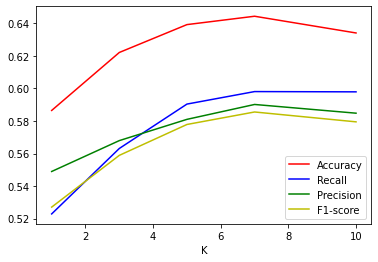

In [ ]:
# Plots
import matplotlib.pyplot as plt

k = [1,3,5,7,10]
all_accuracies = [accuracy_1, accuracy_3, accuracy_5, accuracy_7, accuracy_10]
all_recalls = [total_recall_1, total_recall_3, total_recall_5, total_recall_7, total_recall_10]
all_precisions = [total_precision_1, total_precision_3, total_precision_5, total_precision_7, total_precision_10]
all_f1 = [total_f1_1, total_f1_3, total_f1_5, total_f1_7, total_f1_10]


plt.plot(k,all_accuracies, 'r', label='Accuracy')
plt.plot(k,all_recalls, 'b', label='Recall')
plt.plot(k,all_precisions, 'g', label='Precision')
plt.plot(k,all_f1, 'y', label='F1-score')

plt.legend()
plt.xlabel('K')
plt.show()

## Part **2**

In [ ]:
test

,Sentiment,Tweet,Predicted for k1,Predicted for k3,Predicted for k5,Predicted for k7,Predicted for k10
0,neutral,jump dallasaustin market,neutral,neutral,neutral,neutral,neutral
1,positive,chicago seen seat 6a aa 1620 far great ride pdx,negative,negative,negative,negative,negative
2,negative,need bag bouncer get together,positive,negative,negative,negative,negative
3,negative,hey jetblue stranded entire plane supposed go ...,negative,negative,negative,neutral,neutral
4,negative,big fail curbside baggage pittsburgh charge 30...,negative,negative,negative,negative,negative
...,...,...,...,...,...,...,...
2916,negative,yet next terminal customer service area,negative,negative,negative,negative,negative
2917,neutral,hope pilot good day,positive,neutral,negative,negative,negative
2918,negative,hold 2 hours answer,negative,negative,negative,negative,negative
2919,negative,come already delayed 2 hrs flight 1415 waited...,negative,negative,negative,negative,negative


In [ ]:
train

,Sentiment,Tweet
0,neutral,877 amsterdam ewr 02272015 737300
1,negative,problems link
2,positive,today staff msp took customer service new leve...
3,negative,yet receive assistance one agents securing new...
4,negative,let change reservation online wasting time
...,...,...
11675,negative,hoped contacted 3 wks ago responded still iss...
11676,negative,20 minutes hold waiting ridiculous
11677,neutral,may start service hawaii year
11678,negative,could even see tried make transaction offer p...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train['Tweet'])
X_test = vectorizer.transform(test['Tweet'])

In [ ]:
def KNNneighbour_eval(n):
  neigh = KNeighborsClassifier(n_neighbors=n)
  neigh.fit(X_train, train['Sentiment'])

  y_expect = test['Sentiment']
  y_pred = neigh.predict(X_test)

  print(f"\nAccuracy score for {n} neighbors:")
  print(metrics.accuracy_score(y_expect, y_pred, normalize=True, sample_weight=None))
  print(f"\nClassification report for {n} neighbors\n")
  print(metrics.classification_report(y_expect, y_pred))
  print(f"Confusion matrix for {n} neighbors\n")
  print(metrics.confusion_matrix(y_expect, y_pred))

  report = metrics.classification_report(y_expect, y_pred, output_dict=True)

  accuracy = metrics.accuracy_score(y_expect, y_pred, normalize=True, sample_weight=None)
  precision = report['macro avg']['precision']
  recall = report['macro avg']['recall']
  f1score = report['macro avg']['f1-score']

  return accuracy, precision, recall, f1score


In [ ]:
accuracy1, precision1, recall1, f1score1 = KNNneighbour_eval(1)
accuracy3, precision3, recall3, f1score3 = KNNneighbour_eval(3)
accuracy5, precision5, recall5, f1score5 = KNNneighbour_eval(5)
accuracy7, precision7, recall7, f1score7 = KNNneighbour_eval(7)
accuracy10, precision10, recall10, f1score10 = KNNneighbour_eval(10)


Accuracy score for 1 neighbors:
0.5364601163984937

Classification report for 1 neighbors

              precision    recall  f1-score   support

    negative       0.84      0.48      0.61      1834
     neutral       0.32      0.69      0.43       615
    positive       0.49      0.57      0.53       472

    accuracy                           0.54      2921
   macro avg       0.55      0.58      0.52      2921
weighted avg       0.67      0.54      0.56      2921

Confusion matrix for 1 neighbors

[[876 768 190]
 [106 423  86]
 [ 64 140 268]]

Accuracy score for 3 neighbors:
0.5549469359808284

Classification report for 3 neighbors

              precision    recall  f1-score   support

    negative       0.80      0.52      0.63      1834
     neutral       0.32      0.67      0.43       615
    positive       0.59      0.55      0.57       472

    accuracy                           0.55      2921
   macro avg       0.57      0.58      0.54      2921
weighted avg       0.67      

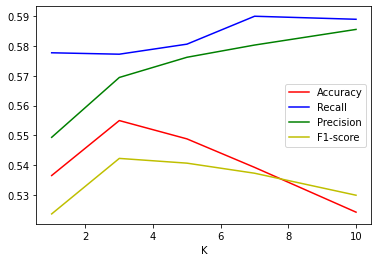

In [ ]:
# Plots
k = [1,3,5,7,10]
all_accuracies = [accuracy1, accuracy3, accuracy5, accuracy7, accuracy10]
all_recalls = [recall1, recall3, recall5, recall7, recall10]
all_precisions = [precision1, precision3, precision5, precision7, precision10]
all_f1 = [f1score1, f1score3, f1score5, f1score7, f1score10]


plt.plot(k,all_accuracies, 'r', label='Accuracy')
plt.plot(k,all_recalls, 'b', label='Recall')
plt.plot(k,all_precisions, 'g', label='Precision')
plt.plot(k,all_f1, 'y', label='F1-score')

plt.legend()
plt.xlabel('K')
plt.show()

### **Part 3**

In [ ]:
!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

--2020-10-16 15:49:26--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.101.30
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.101.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz.1’

GoogleNews-vectors- 100%[===================>]   1.53G  71.1MB/s    in 26s     

2020-10-16 15:49:52 (61.1 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz.1’ saved [1647046227/1647046227]



In [ ]:
from gensim.models import Word2Vec, KeyedVectors

In [ ]:
word2vec = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Part 3 part 1

In [179]:
def extract_features(text):
  words = [word for word in text.split() if word in word2vec.vocab]
  if not words:
    return [0]*300
  else:
    return np.mean(word2vec[words], axis=0)

In [180]:
test = pd.read_csv (r'test.csv')
train = pd.read_csv (r'train.csv')

In [181]:
training_data_in_word2vec = []
for x in train['Tweet']:
  text_embedding = extract_features(x)
  training_data_in_word2vec.append(text_embedding)

testing_data_in_word2vec = []
for x in test['Tweet']:
  text_embedding = extract_features(x)
  testing_data_in_word2vec.append(text_embedding)

In [182]:
def distance_vect(testing, training):
    difference = np.subtract(testing, training)
    squared = np.square(difference)
    sum = np.sum(squared)
    return np.sqrt(sum)

In [183]:
from tqdm import tqdm

def KNN_implement(k, train_words, test_words, testLabels, trainLabels):
  
  predicted_sentiment_array=[]
  for i, ilabel in tqdm(zip(test_words, testLabels), position=0, leave=True):
    all_distances_sentiments = [] 
    for j, jlabel in zip(train_words, trainLabels):
      dist=distance_vect(i, j)
      distance_sentiment_array = (dist,jlabel)
      all_distances_sentiments.append(distance_sentiment_array)  
    
    all_distances_sentiments.sort(key=itemgetter(0))
    value = all_distances_sentiments[:k]
    if k == 1:
      list_1 = value[0]
    else:
      list_1 = max(set(value), key=value.count)

    predicted_sentiment_array.append(list_1[1])
  
  return predicted_sentiment_array

In [184]:
test['Predicted for k1'] = KNN_implement(1, training_data_in_word2vec, testing_data_in_word2vec, test['Sentiment'], train['Sentiment'])

2921it [05:40,  8.59it/s]


In [185]:
# Accuracy
count = 0
for x in range(2921):
  if test['Sentiment'][x] == test['Predicted for k1'][x]:
    count += 1

accuracy_1 = count/2921
print(f'Accuracy for k1 is: {accuracy_1}')

# Totals
total_recall_1 = 0
total_precision_1 = 0
total_f1_1 = 0

# Neutral
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k1'], 'neutral')

# Recall for neutral 
recall = compute_recall(tp, fn)
total_recall_1 = total_recall_1 + recall
print(f'Recall for neutral is: {recall}')

# Precision for neutral
precision = compute_precision(tp, fp)
total_precision_1 = total_precision_1 + precision
print(f'Precision for neutral is: {precision}')

# F1 score for neutral
f1_score = compute_f1_score(precision, recall)
total_f1_1 = total_f1_1 + f1_score
print(f'F1 score for neutral is: {f1_score}\n')

# Positive
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k1'], 'positive')

# Recall for positive 
recall = compute_recall(tp, fn)
total_recall_1 = total_recall_1 + recall
print(f'Recall for positive is: {recall}')

# Precision for positive
precision = compute_precision(tp, fp)
total_precision_1 = total_precision_1 + precision
print(f'Precision for positive is: {precision}')

# F1 score for positive
f1_score = compute_f1_score(precision, recall)
total_f1_1 = total_f1_1 + f1_score
print(f'F1 score for positive is: {f1_score}\n')

# Negative
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k1'], 'negative')

# Recall for negative 
recall = compute_recall(tp, fn)
total_recall_1 = total_recall_1 + recall
print(f'Recall for negative is: {recall}')

# Precision for negative
precision = compute_precision(tp, fp)
total_precision_1 = total_precision_1 + precision
print(f'Precision for negative is: {precision}')

# F1 score for negative
f1_score = compute_f1_score(precision, recall)
total_f1_1 = total_f1_1 + f1_score
print(f'F1 score for negative is: {f1_score}\n')

total_recall_1 = total_recall_1/3
total_precision_1 = total_precision_1/3
total_f1_1 = total_f1_1/3

print(f'Total recall is: {total_recall_1}')
print(f'Total precision is: {total_precision_1}')
print(f'Total F1 score is: {total_f1_1}')

Accuracy for k1 is: 0.6713454296473811
Recall for neutral is: 0.45670995670995673
Precision for neutral is: 0.34308943089430893
F1 score for neutral is: 0.39182915506035276

Recall for positive is: 0.546448087431694
Precision for positive is: 0.423728813559322
F1 score for positive is: 0.477326968973747

Recall for negative is: 0.7405637840420449
Precision for negative is: 0.8451472191930207
F1 score for negative is: 0.789406671759613

Total recall is: 0.5812406093945652
Total precision is: 0.5373218212155505
Total F1 score is: 0.5528542652645708


In [186]:
test['Predicted for k3'] = KNN_implement(3, training_data_in_word2vec, testing_data_in_word2vec, test['Sentiment'], train['Sentiment'])

2921it [05:41,  8.56it/s]


In [187]:
# Accuracy
count = 0
for x in range(2921):
  if test['Sentiment'][x] == test['Predicted for k3'][x]:
    count += 1

accuracy_3 = count/2921
print(f'Accuracy for k3 is: {accuracy_3}')

# Totals
total_recall_3 = 0
total_precision_3 = 0
total_f1_3 = 0

# Neutral
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k3'], 'neutral')

# Recall for neutral 
recall = compute_recall(tp, fn)
total_recall_3 = total_recall_3 + recall
print(f'Recall for neutral is: {recall}')

# Precision for neutral
precision = compute_precision(tp, fp)
total_precision_3 = total_precision_3 + precision
print(f'Precision for neutral is: {precision}')

# F1 score for neutral
f1_score = compute_f1_score(precision, recall)
total_f1_3 = total_f1_3 + f1_score
print(f'F1 score for neutral is: {f1_score}\n')

# Positive
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k3'], 'positive')

# Recall for positive 
recall = compute_recall(tp, fn)
total_recall_3 = total_recall_3 + recall
print(f'Recall for positive is: {recall}')

# Precision for positive
precision = compute_precision(tp, fp)
total_precision_3 = total_precision_3 + precision
print(f'Precision for positive is: {precision}')

# F1 score for positive
f1_score = compute_f1_score(precision, recall)
total_f1_3 = total_f1_3 + f1_score
print(f'F1 score for positive is: {f1_score}\n')

# Negative
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k3'], 'negative')

# Recall for negative 
recall = compute_recall(tp, fn)
total_recall_3 = total_recall_3 + recall
print(f'Recall for negative is: {recall}')

# Precision for negative
precision = compute_precision(tp, fp)
total_precision_3 = total_precision_3 + precision
print(f'Precision for negative is: {precision}')

# F1 score for negative
f1_score = compute_f1_score(precision, recall)
total_f1_3 = total_f1_3 + f1_score
print(f'F1 score for negative is: {f1_score}\n')

total_recall_3 = total_recall_3/3
total_precision_3 = total_precision_3/3
total_f1_3 = total_f1_3/3

print(f'Total recall is: {total_recall_3}')
print(f'Total precision is: {total_precision_3}')
print(f'Total F1 score is: {total_f1_3}')

Accuracy for k3 is: 0.6484080794248545
Recall for neutral is: 0.4621409921671018
Precision for neutral is: 0.28780487804878047
F1 score for neutral is: 0.3547094188376753

Recall for positive is: 0.46397188049209137
Precision for positive is: 0.559322033898305
F1 score for positive is: 0.5072046109510085

Recall for negative is: 0.7379380396140173
Precision for negative is: 0.792257360959651
F1 score for negative is: 0.7641335787536155

Total recall is: 0.5546836374244034
Total precision is: 0.5464614243022455
Total F1 score is: 0.5420158695140999


In [188]:
test['Predicted for k5'] = KNN_implement(5, training_data_in_word2vec, testing_data_in_word2vec, test['Sentiment'], train['Sentiment'])

2921it [05:40,  8.57it/s]


In [189]:
# Accuracy
count = 0
for x in range(2921):
  if test['Sentiment'][x] == test['Predicted for k5'][x]:
    count += 1

accuracy_5 = count/2921
print(f'Accuracy for k5 is: {accuracy_5}')

# Totals
total_recall_5 = 0
total_precision_5 = 0
total_f1_5 = 0

# Neutral
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k5'], 'neutral')

# Recall for neutral 
recall = compute_recall(tp, fn)
total_recall_5 = total_recall_5 + recall
print(f'Recall for neutral is: {recall}')

# Precision for neutral
precision = compute_precision(tp, fp)
total_precision_5 = total_precision_5 + precision
print(f'Precision for neutral is: {precision}')

# F1 score for neutral
f1_score = compute_f1_score(precision, recall)
total_f1_5 = total_f1_5 + f1_score
print(f'F1 score for neutral is: {f1_score}\n')

# Positive
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k5'], 'positive')

# Recall for positive 
recall = compute_recall(tp, fn)
total_recall_5 = total_recall_5 + recall
print(f'Recall for positive is: {recall}')

# Precision for positive
precision = compute_precision(tp, fp)
total_precision_5 = total_precision_5 + precision
print(f'Precision for positive is: {precision}')

# F1 score for positive
f1_score = compute_f1_score(precision, recall)
total_f1_5 = total_f1_5 + f1_score
print(f'F1 score for positive is: {f1_score}\n')

# Negative
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k5'], 'negative')

# Recall for negative 
recall = compute_recall(tp, fn)
total_recall_5 = total_recall_5 + recall
print(f'Recall for negative is: {recall}')

# Precision for negative
precision = compute_precision(tp, fp)
total_precision_5 = total_precision_5 + precision
print(f'Precision for negative is: {precision}')

# F1 score for negative
f1_score = compute_f1_score(precision, recall)
total_f1_5 = total_f1_5 + f1_score
print(f'F1 score for negative is: {f1_score}\n')

total_recall_5 = total_recall_5/3
total_precision_5 = total_precision_5/3
total_f1_5 = total_f1_5/3

print(f'Total recall is: {total_recall_5}')
print(f'Total precision is: {total_precision_5}')
print(f'Total F1 score is: {total_f1_5}')

Accuracy for k5 is: 0.6484080794248545
Recall for neutral is: 0.7327586206896551
Precision for neutral is: 0.13821138211382114
F1 score for neutral is: 0.23255813953488375

Recall for positive is: 0.4140302613480055
Precision for positive is: 0.6377118644067796
F1 score for positive is: 0.5020850708924103

Recall for negative is: 0.7256977863330125
Precision for negative is: 0.822246455834242
F1 score for negative is: 0.7709611451942742

Total recall is: 0.6241622227902244
Total precision is: 0.5327232341182809
Total F1 score is: 0.5018681185405227


In [190]:
test['Predicted for k7'] = KNN_implement(7, training_data_in_word2vec, testing_data_in_word2vec, test['Sentiment'], train['Sentiment'])

2921it [05:35,  8.69it/s]


In [191]:
# Accuracy
count = 0
for x in range(2921):
  if test['Sentiment'][x] == test['Predicted for k7'][x]:
    count += 1

accuracy_7 = count/2921
print(f'Accuracy for k7 is: {accuracy_7}')

# Totals
total_recall_7 = 0
total_precision_7 = 0
total_f1_7 = 0

# Neutral
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k7'], 'neutral')

# Recall for neutral 
recall = compute_recall(tp, fn)
total_recall_7 = total_recall_7 + recall
print(f'Recall for neutral is: {recall}')

# Precision for neutral
precision = compute_precision(tp, fp)
total_precision_7 = total_precision_7 + precision
print(f'Precision for neutral is: {precision}')

# F1 score for neutral
f1_score = compute_f1_score(precision, recall)
total_f1_7 = total_f1_7 + f1_score
print(f'F1 score for neutral is: {f1_score}\n')

# Positive
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k7'], 'positive')

# Recall for positive 
recall = compute_recall(tp, fn)
total_recall_7 = total_recall_7 + recall
print(f'Recall for positive is: {recall}')

# Precision for positive
precision = compute_precision(tp, fp)
total_precision_7 = total_precision_7 + precision
print(f'Precision for positive is: {precision}')

# F1 score for positive
f1_score = compute_f1_score(precision, recall)
total_f1_7 = total_f1_7 + f1_score
print(f'F1 score for positive is: {f1_score}\n')

# Negative
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k7'], 'negative')

# Recall for negative 
recall = compute_recall(tp, fn)
total_recall_7 = total_recall_7 + recall
print(f'Recall for negative is: {recall}')

# Precision for negative
precision = compute_precision(tp, fp)
total_precision_7 = total_precision_7 + precision
print(f'Precision for negative is: {precision}')

# F1 score for negative
f1_score = compute_f1_score(precision, recall)
total_f1_7 = total_f1_7 + f1_score
print(f'F1 score for negative is: {f1_score}\n')

total_recall_7 = total_recall_7/3
total_precision_7 = total_precision_7/3
total_f1_7 = total_f1_7/3

print(f'Total recall is: {total_recall_7}')
print(f'Total precision is: {total_precision_7}')
print(f'Total F1 score is: {total_f1_7}')

Accuracy for k7 is: 0.6138308798356727
Recall for neutral is: 0.6981132075471698
Precision for neutral is: 0.12032520325203253
F1 score for neutral is: 0.20527045769764216

Recall for positive is: 0.35903337169159955
Precision for positive is: 0.6610169491525424
F1 score for positive is: 0.4653243847874721

Recall for negative is: 0.7230215827338129
Precision for negative is: 0.767175572519084
F1 score for negative is: 0.7444444444444444

Total recall is: 0.5933893873241941
Total precision is: 0.5161725749745529
Total F1 score is: 0.4716797623098528


In [192]:
test['Predicted for k10'] = KNN_implement(10, training_data_in_word2vec, testing_data_in_word2vec, test['Sentiment'], train['Sentiment'])

2921it [05:36,  8.68it/s]


In [193]:
# Accuracy
count = 0
for x in range(2921):
  if test['Sentiment'][x] == test['Predicted for k10'][x]:
    count += 1

accuracy_10 = count/2921
print(f'Accuracy for k1 is: {accuracy_10}')

# Totals
total_recall_10 = 0
total_precision_10 = 0
total_f1_10 = 0

# Neutral
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k10'], 'neutral')

# Recall for neutral 
recall = compute_recall(tp, fn)
total_recall_10 = total_recall_10 + recall
print(f'Recall for neutral is: {recall}')

# Precision for neutral
precision = compute_precision(tp, fp)
total_precision_10 = total_precision_10 + precision
print(f'Precision for neutral is: {precision}')

# F1 score for neutral
f1_score = compute_f1_score(precision, recall)
total_f1_10 = total_f1_10 + f1_score
print(f'F1 score for neutral is: {f1_score}\n')

# Positive
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k10'], 'positive')

# Recall for positive 
recall = compute_recall(tp, fn)
total_recall_10 = total_recall_10 + recall
print(f'Recall for positive is: {recall}')

# Precision for positive
precision = compute_precision(tp, fp)
total_precision_10 = total_precision_10 + precision
print(f'Precision for positive is: {precision}')

# F1 score for positive
f1_score = compute_f1_score(precision, recall)
total_f1_10 = total_f1_10 + f1_score
print(f'F1 score for positive is: {f1_score}\n')

# Negative
tp, tn, fp, fn =  compute_tp_tn_fn_fp(test['Sentiment'], test['Predicted for k10'], 'negative')

# Recall for negative 
recall = compute_recall(tp, fn)
total_recall_10 = total_recall_10 + recall
print(f'Recall for negative is: {recall}')

# Precision for negative
precision = compute_precision(tp, fp)
total_precision_10 = total_precision_10 + precision
print(f'Precision for negative is: {precision}')

# F1 score for negative
f1_score = compute_f1_score(precision, recall)
total_f1_10 = total_f1_10 + f1_score
print(f'F1 score for negative is: {f1_score}\n')

total_recall_10 = total_recall_10/3
total_precision_10 = total_precision_10/3
total_f1_10 = total_f1_10/3

print(f'Total recall is: {total_recall_10}')
print(f'Total precision is: {total_precision_10}')
print(f'Total F1 score is: {total_f1_10}')

Accuracy for k1 is: 0.5816501198219788
Recall for neutral is: 0.6697247706422018
Precision for neutral is: 0.11869918699186992
F1 score for neutral is: 0.20165745856353592

Recall for positive is: 0.3200775945683802
Precision for positive is: 0.6991525423728814
F1 score for positive is: 0.43912175648702595

Recall for negative is: 0.7276810780460415
Precision for negative is: 0.7066521264994547
F1 score for negative is: 0.7170124481327802

Total recall is: 0.5724944810855411
Total precision is: 0.5081679519547353
Total F1 score is: 0.45259722106111405


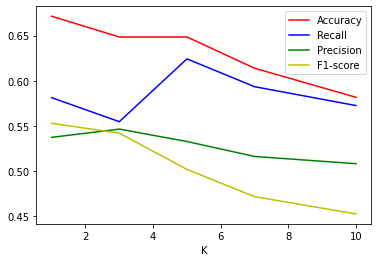

In [194]:
# Plots
import matplotlib.pyplot as plt

k = [1,3,5,7,10]
all_accuracies = [accuracy_1, accuracy_3, accuracy_5, accuracy_7, accuracy_10]
all_recalls = [total_recall_1, total_recall_3, total_recall_5, total_recall_7, total_recall_10]
all_precisions = [total_precision_1, total_precision_3, total_precision_5, total_precision_7, total_precision_10]
all_f1 = [total_f1_1, total_f1_3, total_f1_5, total_f1_7, total_f1_10]


plt.plot(k,all_accuracies, 'r', label='Accuracy')
plt.plot(k,all_recalls, 'b', label='Recall')
plt.plot(k,all_precisions, 'g', label='Precision')
plt.plot(k,all_f1, 'y', label='F1-score')

plt.legend()
plt.xlabel('K')
plt.show()

Part 3 part 2

In [195]:
def KNNneighbour_eval(n):
  neigh = KNeighborsClassifier(n_neighbors=n)
  neigh.fit(training_data_in_word2vec, train['Sentiment'])

  y_expect = test['Sentiment']
  y_pred = neigh.predict(testing_data_in_word2vec)

  print(f"\nAccuracy score for {n} neighbors:")
  print(metrics.accuracy_score(y_expect, y_pred, normalize=True, sample_weight=None))
  print(f"\nClassification report for {n} neighbors\n")
  print(metrics.classification_report(y_expect, y_pred))
  print(f"Confusion matrix for {n} neighbors\n")
  print(metrics.confusion_matrix(y_expect, y_pred))

  report = metrics.classification_report(y_expect, y_pred, output_dict=True)

  accuracy = metrics.accuracy_score(y_expect, y_pred, normalize=True, sample_weight=None)
  precision = report['macro avg']['precision']
  recall = report['macro avg']['recall']
  f1score = report['macro avg']['f1-score']

  return accuracy, precision, recall, f1score

In [196]:
accuracy1, precision1, recall1, f1score1 = KNNneighbour_eval(1)
accuracy3, precision3, recall3, f1score3 = KNNneighbour_eval(3)
accuracy5, precision5, recall5, f1score5 = KNNneighbour_eval(5)
accuracy7, precision7, recall7, f1score7 = KNNneighbour_eval(7)
accuracy10, precision10, recall10, f1score10 = KNNneighbour_eval(10)


Accuracy score for 1 neighbors:
0.6689489900718932

Classification report for 1 neighbors

              precision    recall  f1-score   support

    negative       0.73      0.85      0.79      1834
     neutral       0.45      0.34      0.39       615
    positive       0.55      0.41      0.47       472

    accuracy                           0.67      2921
   macro avg       0.58      0.53      0.55      2921
weighted avg       0.65      0.67      0.65      2921

Confusion matrix for 1 neighbors

[[1551  184   99]
 [ 349  211   55]
 [ 211   69  192]]

Accuracy score for 3 neighbors:
0.7059226292365628

Classification report for 3 neighbors

              precision    recall  f1-score   support

    negative       0.72      0.94      0.81      1834
     neutral       0.60      0.27      0.38       615
    positive       0.73      0.35      0.47       472

    accuracy                           0.71      2921
   macro avg       0.68      0.52      0.55      2921
weighted avg       0

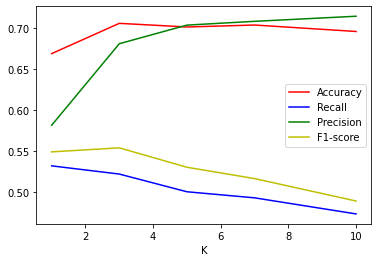

In [197]:
# Plots
k = [1,3,5,7,10]
all_accuracies = [accuracy1, accuracy3, accuracy5, accuracy7, accuracy10]
all_recalls = [recall1, recall3, recall5, recall7, recall10]
all_precisions = [precision1, precision3, precision5, precision7, precision10]
all_f1 = [f1score1, f1score3, f1score5, f1score7, f1score10]


plt.plot(k,all_accuracies, 'r', label='Accuracy')
plt.plot(k,all_recalls, 'b', label='Recall')
plt.plot(k,all_precisions, 'g', label='Precision')
plt.plot(k,all_f1, 'y', label='F1-score')

plt.legend()
plt.xlabel('K')
plt.show()